In [18]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [19]:
data_file = 'repressor_timeseries.csv'
df_data = pd.read_csv(data_file, sep='\t')

print('Dataset:')
print(df_data.head())

num_experiments = 3

#Get a 1D numpy array of x-values (repressor concentrations)
x = np.ravel(np.array(list(df_data.repressor_conc)))[::-1]
#Get a 2D matrix of measured target y-values (fluorescence). Rows are indepdendent experiments, Columns fluorescence values.
targets = np.zeros((num_experiments, len(x)))
for i in range(1, 1 + num_experiments) :
    target = np.ravel(np.array(list(df_data['fluorescence_' + str(i)])))[::-1]
    targets[i-1, :] = target
    
print (x)
print (targets)

Dataset:
   repressor_conc  fluorescence_1  fluorescence_2  fluorescence_3
0       41.152263            1683            1811            2139
1       13.717421            1818            1724            1789
2        4.572474            1863            1878            1909
3        1.524158            2301            2264            2096
4        0.508053            2329            2245            2610
[  0.00000000e+00   7.74352000e-05   2.32305700e-04   6.96917200e-04
   2.09075160e-03   6.27225470e-03   1.88167642e-02   5.64502927e-02
   1.69350878e-01   5.08052634e-01   1.52415790e+00   4.57247371e+00
   1.37174211e+01   4.11522634e+01]
[[ 20962.  20877.  20624.  16697.   7718.   7059.   3686.   2936.   3330.
    2329.   2301.   1863.   1818.   1683.]
 [ 21047.  20292.  19405.  15775.   8933.   6300.   3539.   2796.   3133.
    2245.   2264.   1878.   1724.   1811.]
 [ 22735.  21919.  21047.  15395.   7321.   5952.   3343.   2865.   2774.
    2610.   2096.   1909.   1789.   2139.]]


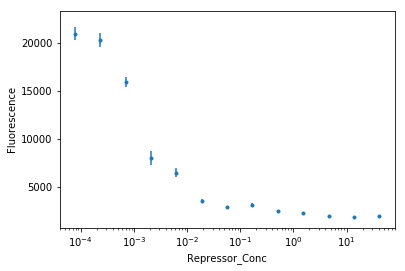

In [20]:
###
#
# Problem 2.a: Compute the mean and standard deviation of the measured values (mean fluorescence and deviation between the experiments,
# for each data point), and plot the them. Where in the hill-curve, according to the data, do you see most variation?
#
###
mean = np.mean(targets, axis=0)
sd = np.std(targets, axis=0)
plt.errorbar(x,mean,sd, linestyle='None', marker='.')
plt.xscale('log')
plt.xlabel("Repressor_Conc")
plt.ylabel('Fluorescence')
plt.show()

In [21]:
###
#
# Problem 2.b: Implement the function hill_curve,
# which computes the hill-curve values of the input repressor values x (numpy array).
#
###
def hill_curve(G_max, n, K, G_0, x) :
    return G_max / (1+(x*K)**n ) + G_0
###
#
# Problem 2.b: Implement the function objective_function.
# It should return the Sum-of-squared Error between target (measured) and predicted fluorescence.
# The input repressor values and target fluorescence values can be passed 
# into the args-parameter via scipy.optimize.minimize.
# The predicted fluorescence values should be computed by calling the hill_curve function.
#
###
def objective_function(params, args) :
    
    x, target = args
    
    G_max = params[0]
    n = params[1]
    K = params[2]
    G_0 = params[3]

    return sum((target- hill_curve(G_max, n, K, G_0, x))**2)

###
# This defines the constraints that must be satisfied by the numerical optimizer:
#
# G_max >= 0
# 0 <= n <= 5
# K >= 0
# G_0 >= 0
#
###
cons = (
    #G_max >= 0
    {'type': 'ineq',
    'fun' : lambda x: np.array([x[0]]),
    'jac' : lambda x: np.array([1, 0, 0, 0])},
    #n >= 0
    {'type': 'ineq',
    'fun' : lambda x: np.array([x[1]]),
    'jac' : lambda x: np.array([0, 1, 0, 0])},
    #n <= 5
    {'type': 'ineq',
    'fun' : lambda x: np.array([5 - x[1]]),
    'jac' : lambda x: np.array([0, -1, 0, 0])},
    #K >= 0
    {'type': 'ineq',
    'fun' : lambda x: np.array([x[2]]),
    'jac' : lambda x: np.array([0, 0, 1, 0])},
    #G_0 >= 0
    {'type': 'ineq',
    'fun' : lambda x: np.array([x[3]]),
    'jac' : lambda x: np.array([0, 0, 0, 1])}
)


###
#
# Problem 2.b: Write code using the scipy function scipy.optimize.minimize
# to fit a hill-curve model (consisting of the 4 parameters above) to the experimental data.
# The input values are the repressor concentration values.
# The target (measured) values are the mean fluorescence values.
# Finally plot the fitted hill-curve in the range (0, 100]. Overlay the experimental means.
#
# Tip: The hill-curve is a highly non-linear function of the free parameters we want to fit.
# In such cases, the optimization is not guaranteed to be convex and you could end up in a bad local minima.
# Therefore it's good practice to randomly initialize the parameters.
# For example, randomly initializing n in range [0, 5] and the other parameters in range [0, 10^5].
#
###
#params = [np.random.randint(0, 10**5),np.random.randint(0, 5),np.random.randint(0, 10**5),np.random.randint(0, 10**5)]
params = [19565,1.177,774.5,2374.8]

#the params are offer from Eric Yang

#minimize
result=minimize(objective_function, params, args=[x,mean], constraints=cons, method='SLSQP',options={'disp': True})
print (result.x)




Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6498699.279296576
            Iterations: 9
            Function evaluations: 87
            Gradient evaluations: 9
[  1.95650528e+04   1.17788493e+00   7.74512211e+02   2.37482892e+03]


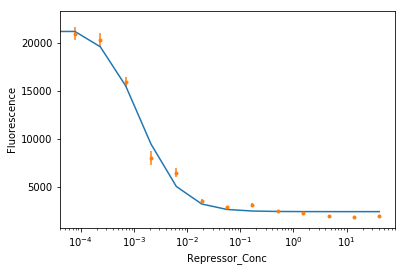

In [22]:
plt.plot(x,hill_curve(result.x[0],result.x[1],result.x[2],result.x[3],x))
plt.errorbar(x,mean,sd, linestyle='None', marker='.')
plt.xscale('log')
plt.xlabel("Repressor_Conc")
plt.ylabel('Fluorescence')
plt.show()
